In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from matplotlib import pylab as plt
from sklearn.metrics import accuracy_score

In [4]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")
train_labels = train["label"]
train_data = train.drop(columns=["label"])
y_test = test["label"]
X_test = test.drop(columns=["label"])
X_train, X_validation, y_train, y_validation = train_test_split(train_data, train_labels, test_size=0.1)

In [10]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(100,), learning_rate="constant", learning_rate_init=0.001)
clf.fit(train_data, train_labels)
predictions_train = clf.predict(train_data)
train_score = accuracy_score(predictions_train, train_labels)
print("train accuracy: ", train_score)

train accuracy:  0.8961166666666667


Text(0, 0.5, 'error')

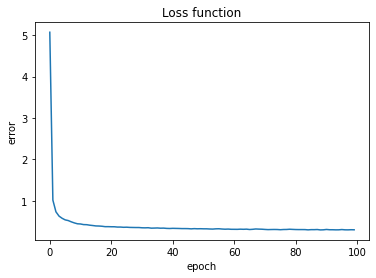

In [11]:
plt.plot(clf.loss_curve_)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("error")

In [12]:
clf.fit(X_validation, y_validation)
predictions_validation = clf.predict(X_validation)
validation_score = accuracy_score(predictions_validation, y_validation)
print("validation accuracy: ", validation_score)

validation accuracy:  0.9296666666666666


Text(0, 0.5, 'error')

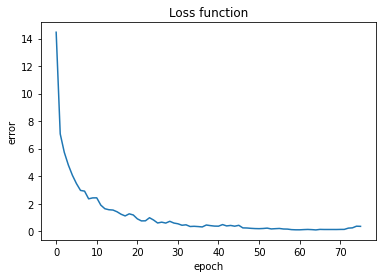

In [13]:
plt.plot(clf.loss_curve_)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("error")

In [15]:
predictions_test = clf.predict(X_test)
test_score = accuracy_score(predictions_test, y_test)
print("test accuracy: ", test_score)

test accuracy:  0.7989


In [7]:
def mlp(l = 100,lw = 10,s='adam',lr=0.001):

    clf = MLPClassifier(solver=s, hidden_layer_sizes=(l,lw), learning_rate="constant", learning_rate_init=lr, max_iter=1000)
    clf.fit(train_data, train_labels)
    predictions_test = clf.predict(X_test)
    test_score = accuracy_score(predictions_test, y_test)
    return test_score

In [11]:
layers = [1, 4]
layers_width = [50,150]
solvers = ['sgd', 'lbfgs', 'adam']
learning_rate = [0.9,0.01,0.001]

best_layer = 1
best_layer_width = 50
best_solver = 'sgd'
best_learning_rate = 0.9
best_accuracy = 0

for l in layers:
    accuracy = mlp(l= l)
    print("layers:",l,"-> accuracy:",accuracy)
    if best_accuracy < accuracy:
        best_layer = l
        best_accuracy = accuracy

best_accuracy = 0
for lw in layers_width:
    accuracy = mlp(lw=lw)
    print("layer width:",lw,"-> accuracy:",accuracy)
    if best_accuracy < accuracy:
        best_layer_width = lw
        best_accuracy = accuracy

best_accuracy = 0
for s in solvers:
    accuracy = mlp(s=s)
    print("solver:",s,"-> accuracy:",accuracy)
    if best_accuracy < accuracy:
        best_solver = s
        best_accuracy = accuracy

best_accuracy = 0            
for lr in learning_rate:
    accuracy = mlp(lr=lr)
    print("learning rate:",lr,"-> accuracy:",accuracy)
    if best_accuracy < accuracy:
        best_learning_rate = lr
        best_accuracy = accuracy
                
print("best layer:", best_layer, "best width:", best_layer_width, 
      "best solver:", best_solver,"best learning rate:", best_learning_rate)   
print("accuracy:",mlp(best_layer,best_layer_width,best_solver,best_learning_rate))             

layers: 1 -> accuracy: 0.1
layers: 4 -> accuracy: 0.361
layer width: 50 -> accuracy: 0.875
layer width: 150 -> accuracy: 0.8717
solver: sgd -> accuracy: 0.1
solver: lbfgs -> accuracy: 0.291
solver: adam -> accuracy: 0.8723
learning rate: 0.9 -> accuracy: 0.1
learning rate: 0.01 -> accuracy: 0.1
learning rate: 0.001 -> accuracy: 0.8766
best layer: 4 best width: 150 best solver: adam best learning rate: 0.001
accuracy: 0.8128
